# Communities and Crime Regression Task

## About The Data

**Communities within the United States.** The data combines socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR.

Data contains 128 attribute and 1993 instances, with a lot of missing values, and some non-predictive features that were mentioned on the communities.names file attached with the datsaet

## Data Cleaning and EDA

As mentioned above, the dataset is not ready to go to the modeling phase yet, so we start with a preprocessing step

The dataset file (communities.data) contains the data without the attribute that were located with thier explanations in the communities.names file, so we first prepare the initial dataset to work with.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
features = pd.read_csv('../../data/original data/communities+and+crime/attributes_list.csv')
data = pd.read_csv('../../data/original data/communities+and+crime/communities.data', names = features['features'])

In [28]:
print(data.shape)

(1994, 128)


We the drop the non-predicive features stated in the data description (state,county,
                          community,communityname,
                          fold)

In [29]:
data = data.drop(columns=['state','county',
                          'community','communityname',
                          'fold'], axis=1)
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


We are now left with 122 features, with the target attribute, but the data contains some missing values labelled with a '?' sign

In [30]:
data = data.replace('?', np.nan)
feat_miss = data.columns[data.isnull().any()]


print(feat_miss)
feat_miss.shape

Index(['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps',
       'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop',
       'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol',
       'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian',
       'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz',
       'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr',
       'LemasGangUnitDeploy', 'PolicBudgPerPop'],
      dtype='object')


(23,)

23 features contain missing values, we handle them differently based on how many are there missing. 

In [31]:
data[feat_miss[0:23]].describe()

,OtherPerCap,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,...,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop
count,1993,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319
unique,97,38,52,34,55,44,59,75,52,76,...,50,72,30,15,77,63,38,72,3,51
top,0,0.02,0.1,0.98,0.19,0.02,0.14,0.23,0.1,0.78,...,0,0.07,0.03,0.57,0.19,0.02,0.02,0.74,0,0.12
freq,129,80,19,81,17,55,23,15,19,12,...,189,14,48,54,12,27,69,13,126,22


Only the 'OtherPerCap' has one missing value, the rest of the attributes contains 319 missing one.

We use the Imputer library to fill the missing value of the 'OtherPerCap' with its mean since it is a numerical value representing the per capita income for people with 'other' heritage

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

data[['OtherPerCap']] = imputer.fit_transform(data[['OtherPerCap']])


And then we drop the rest of the columns containing missing values

In [33]:
data = data.dropna(axis=1)
print(data.shape)
data.head()

(1994, 101)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03


**Target Feature**: ViolentCrimesPerPop which is the total number of violent crimes per 100K popuation is our numerical target feature

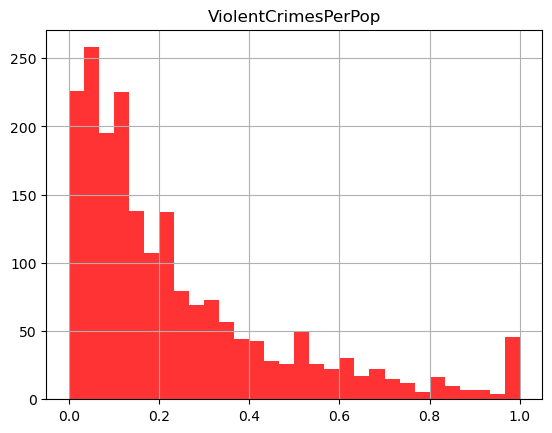

In [34]:
#show the target
data.hist(column = ['ViolentCrimesPerPop'], bins = 30, color = 'red', alpha = 0.8)
plt.show()

We plot the correlations between each attribute

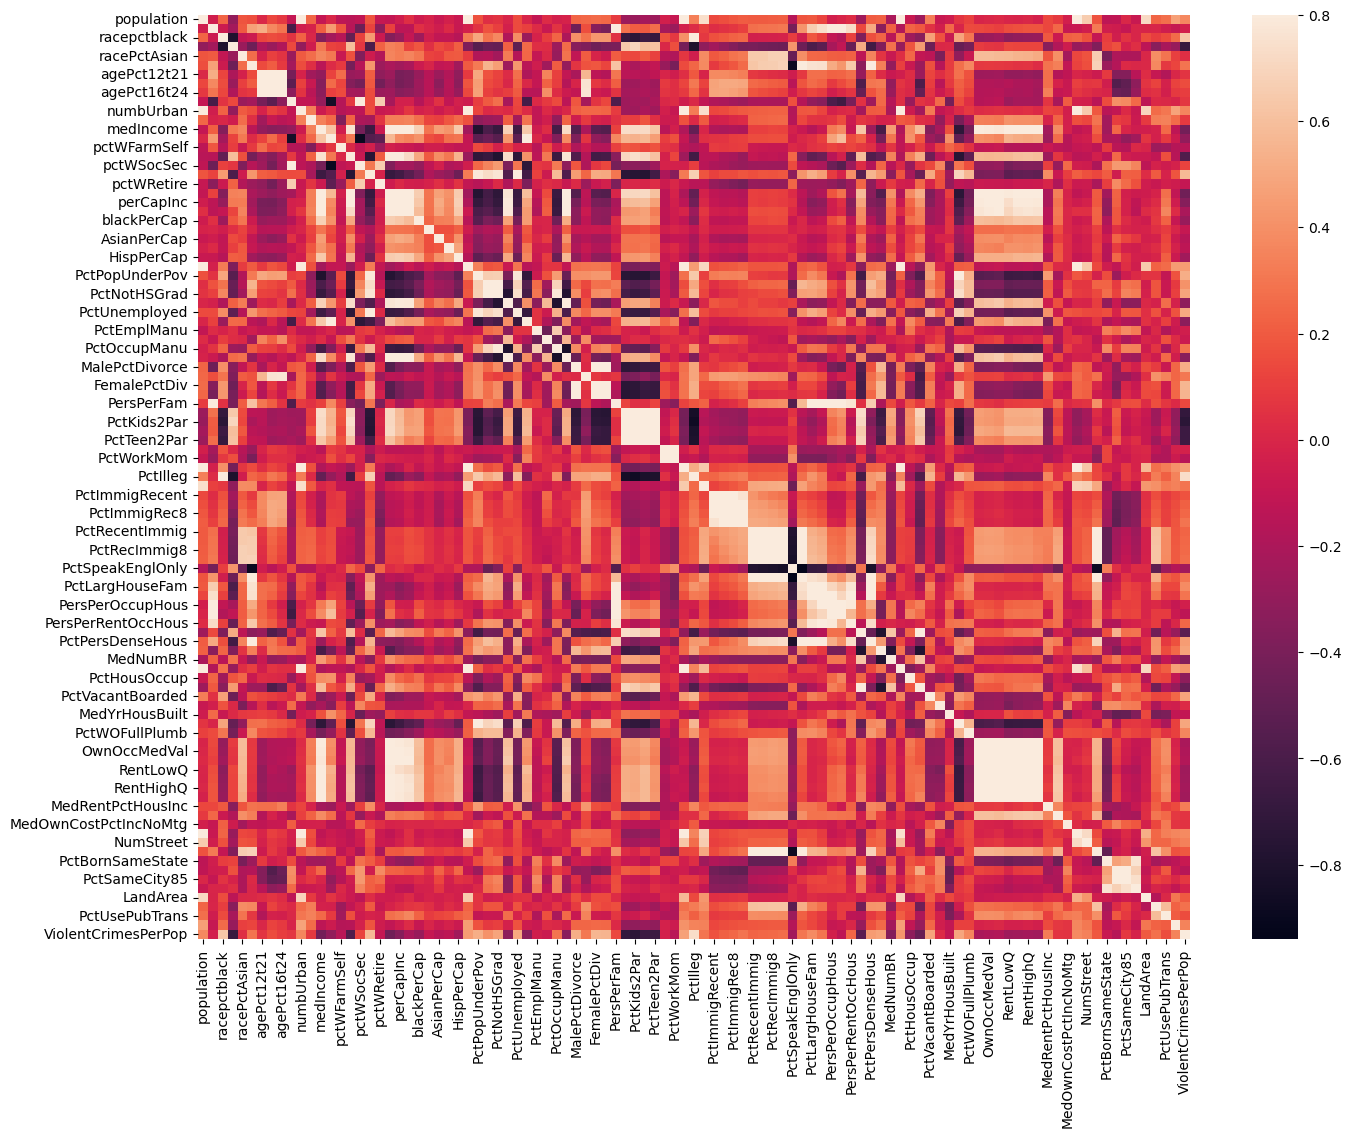

In [35]:
import seaborn as sns

corrmat = data.corr()
fig = plt.figure(figsize = (16, 12))

sns.heatmap(corrmat, vmax = 0.8)
plt.show()

### Dimentionality Reduction

We will start with some **PCA**, since the dataset contains many highly correlated variables that may increase the model's variance. **PCA** will transform the features into a set of principal components that are uncorrelated features. This will help stabilizing the linear regression model.

In [36]:
X = data.iloc[:, 0:100].values # we have 100 features after dropping the ones containing null values
y = data.iloc[:, 100].values

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X.shape)
print(y.shape)

(1994, 100)
(1994,)


Since **PCA** is extremely sensitive to scale, we need to standerdize the data (turning the mean=0 and STD=1)

In [38]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

We fine-tune the PCA's parameter C (number of principal components)

Amount of variance: [24.93272121 16.97311784  9.62888488  7.52380333  5.65252503  4.25378242
  3.32736151  2.96929542  2.01681861  1.59508497  1.55048815  1.41547648
  1.3572213   1.04586445]
Sum of the variance: 84.24
Percentage of variance: [0.24914848 0.16960951 0.09621982 0.0751841  0.05648473 0.04250733
 0.03324976 0.02967167 0.02015373 0.01593942 0.01549377 0.01414462
 0.01356248 0.01045115]
Sum of the percentage of variance: 0.84


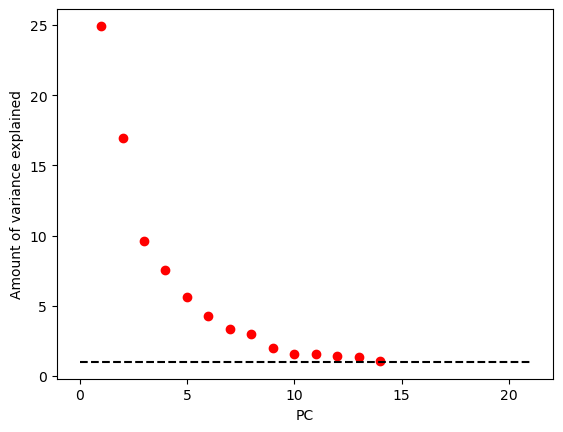

(1395, 14)


In [39]:

from sklearn.decomposition import PCA

c = 14
pca = PCA(n_components = c)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

print("Amount of variance: %s" % pca.explained_variance_)
print("Sum of the variance: %s" % sum(pca.explained_variance_).round(2))

print("Percentage of variance: %s" % pca.explained_variance_ratio_)
print("Sum of the percentage of variance: %s" % sum(pca.explained_variance_ratio_).round(2))


plt.scatter(np.arange(1,(c+1)),pca.explained_variance_, c = 'red')
plt.plot((0,21), (1,1), color = 'black', linestyle = 'dashed')
plt.xlabel('PC')
plt.ylabel('Amount of variance explained')
plt.show()
print(X_train.shape)

We will use a Random Sample Consensus because it ignores outliers, it only fits the model with good points by:
1. Randomly selects a small random subset of the data.
2. Fits a basic model (e.g., LinearRegression) only on this subset.
3. Tests how many points in the full dataset agree with this model (i.e., are "inliers").
4. Repeats the process many times (max_trials times).
5. Chooses the model that had the most "inliers."

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=0.55,
                         random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)

y_pred[y_pred < 0] = 0 #since the proba can't be negative

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))

We evaluate the model's results on the training set

R^2: 0.6423
MSE: 0.0203
MAE: 0.0990
rms: 0.1433


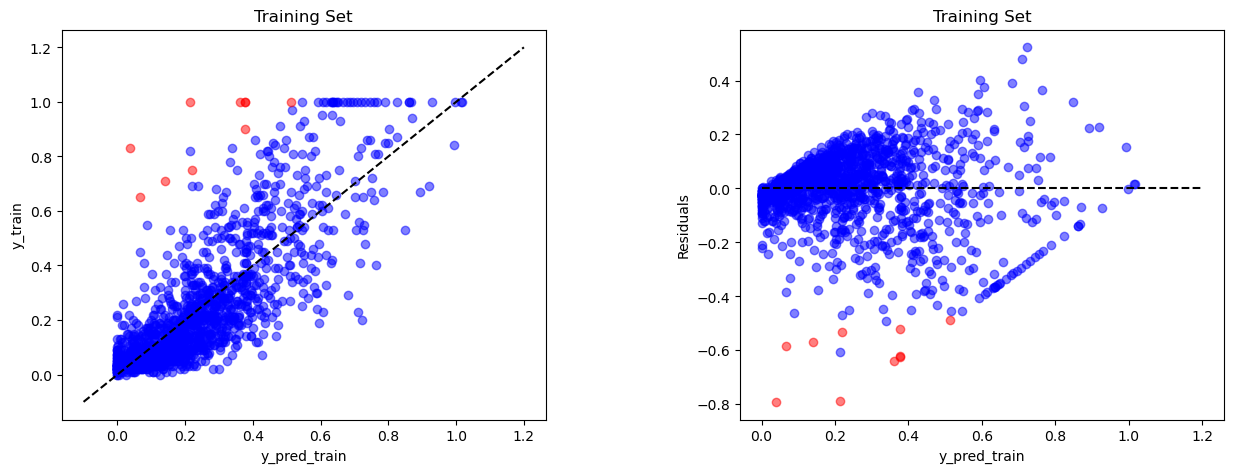

In [41]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()


Now on the test set

R^2: 0.6418
MSE: 0.0172
MAE: 0.0930
rms: 0.1326


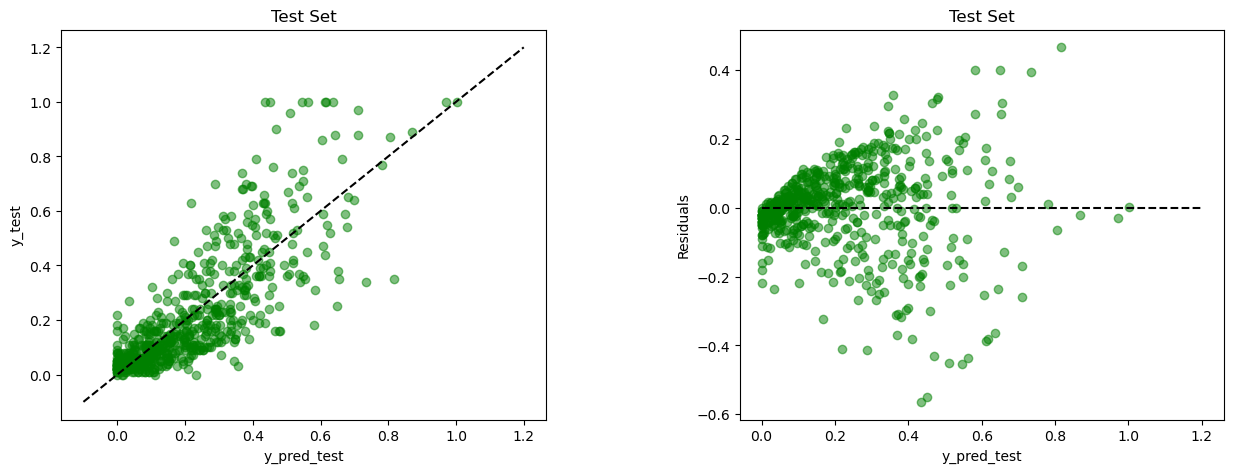

In [42]:
y_pred_test = model.predict(X_test)
y_pred_test[y_pred_test < 0] = 0

nrp = X_test.shape[1]+1
rms = np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-nrp))

print('R^2: %.4f' % r2_score(y_test,y_pred_test))
print('MSE: %.4f' % mean_squared_error(y_test,y_pred_test))
print('MAE: %.4f' % mean_absolute_error(y_test,y_pred_test))
print('rms: %.4f' % rms)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred_test, y_test, c = 'green', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Test Set')
ax1.set_xlabel('y_pred_test')
ax1.set_ylabel('y_test')

ax2 = plt.subplot(122)
ax2.scatter(y_pred_test, y_pred_test - y_test, c = 'green', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Test Set')
ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

The model have an R^2 = 0.642 using cross validation in both training and unssen datasets

The problem of this approach is the interpretibility of the factors to explain the crimes rate predictions, since we got at the end 14 features using PCA.

**Feature selection**

In [44]:
# feature selection
X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [45]:

from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

And below we can compare between PCA and feature selection techinque using KBest based on the mutual information

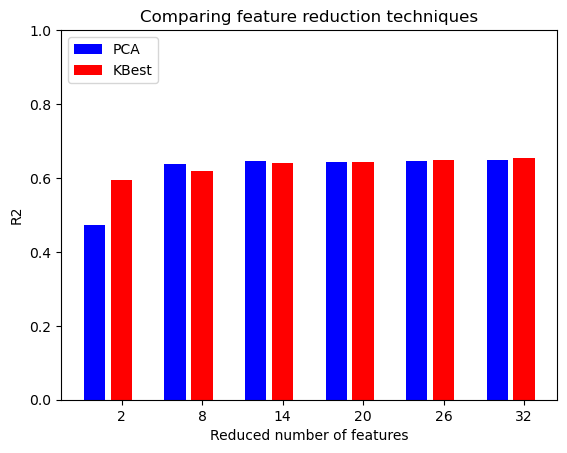

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import ShuffleSplit
from sklearn.feature_selection import SelectKBest, mutual_info_regression


pipe = Pipeline([('reduce_dim', PCA()), 
                 ('regressor', LinearRegression())])

N_FEATURES_OPTIONS = [2, 8, 14, 20, 26, 32]

param_grid = [
    {
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
    },
    {
        'reduce_dim': [SelectKBest(mutual_info_regression)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
    },
]

reducer_labels = ['PCA', 'KBest']

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

grid = GridSearchCV(pipe, cv=cv, n_jobs=1, param_grid=param_grid)
grid.fit(X_train, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(-1, len(N_FEATURES_OPTIONS))
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'br'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('R2')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()

In [24]:
mean_scores

array([[0.44704963, 0.62801918, 0.64171185, 0.64315054, 0.64787993,
        0.64829583],
       [0.58204473, 0.6220513 , 0.63146354, 0.63753932, 0.64589317,
        0.65327391]])

And this results show that PCA performed better than univariate feature selection as a selection method for ViolentCrimesPerPop predictions

But since we have said that interpretibility is the problem of PCA, we can use another more sophisticated feature selection algorithm: **Recursive Feature Elimination with cross-validation**, where:
1. We start with all the features.

2. Train a model on the data.

3. Rank the features by importance according to the model.

4. Remove the least important feature(s).

5. Cross-validate the model's performance at this step.

6. Repeat steps 2–5 until we're left with only one feature.

7. Finally, choose the number of features that gave the best cross-validation score, so that the model gives us how many features should we keep.

In [67]:
#recursive feature elimination with cross validation

X = data.iloc[:, 0:100].values
y = data.iloc[:, 100].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

from sklearn.feature_selection import RFE, RFECV
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

estimator = LinearRegression()
selector = RFECV(estimator, step=1, cv=cv, scoring = 'r2')
selector = selector.fit(X_train, y_train)

In [68]:
print("Optimal number of features : %d" % selector.n_features_)
mask = selector.get_support()

Optimal number of features : 33


It suggests that the optimal number of features is 33


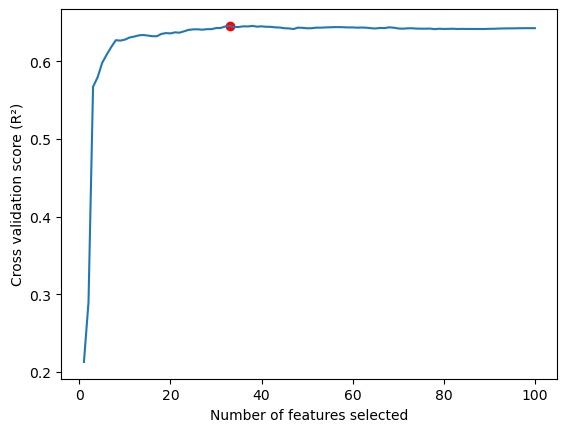

In [69]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (R²)")
plt.plot(range(1, len(selector.cv_results_["mean_test_score"]) + 1), selector.cv_results_["mean_test_score"])
plt.scatter(selector.n_features_, np.max(selector.cv_results_["mean_test_score"]), c='red')
plt.show()


In [70]:

# Applying the mask
X_train = X_train[:, mask]
X_test = X_test[:, mask]

In [71]:
#removing some outliers
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=0.55,
                         random_state=0)


model.fit(X_train, y_train)

y_pred = model.predict(X_train)
y_pred[y_pred < 0] = 0

K = X_train.shape[1]+1
rms = np.sqrt(sum((y_train-y_pred)**2)/(len(y_train)-K))

R^2: 0.6767
MSE: 0.0176
MAE: 0.0922
rms: 0.1344


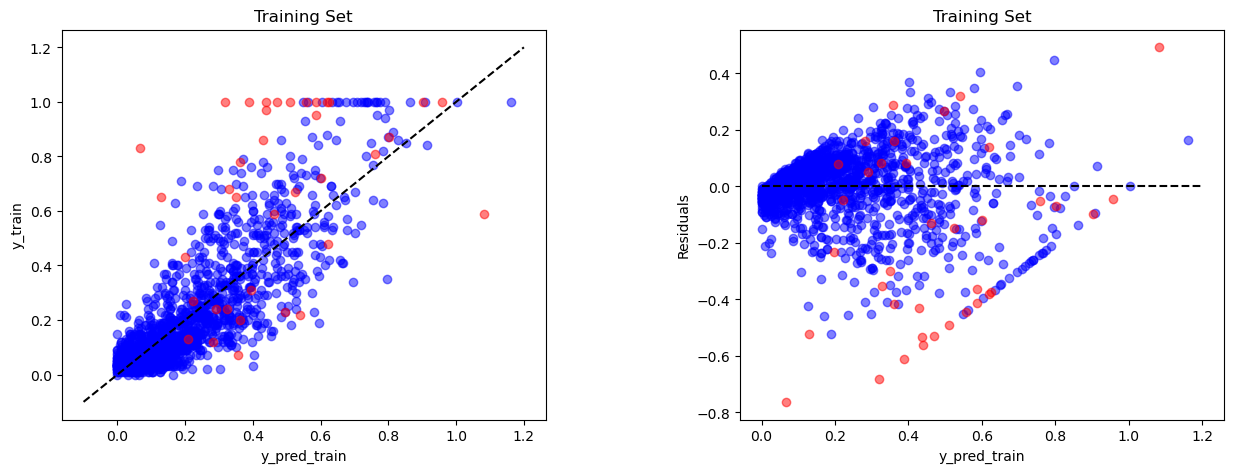

In [72]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R^2: %.4f' % r2_score(y_train,y_pred))
print('MSE: %.4f' % mean_squared_error(y_train,y_pred))
print('MAE: %.4f' % mean_absolute_error(y_train,y_pred))
print('rms: %.4f' % rms)

inlier_mask = model.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred[inlier_mask], y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax1.scatter(y_pred[outlier_mask], y_train[outlier_mask], c = 'red', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Training Set')
ax1.set_xlabel('y_pred_train')
ax1.set_ylabel('y_train')

ax2 = plt.subplot(122)
ax2.scatter(y_pred[inlier_mask], y_pred[inlier_mask] - y_train[inlier_mask], c = 'blue', alpha = 0.5)
ax2.scatter(y_pred[outlier_mask], y_pred[outlier_mask] - y_train[outlier_mask], c = 'red', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Training Set')
ax2.set_xlabel('y_pred_train')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)

R^2: 0.6544
MSE: 0.0185
MAE: 0.0938
rms: 0.1402


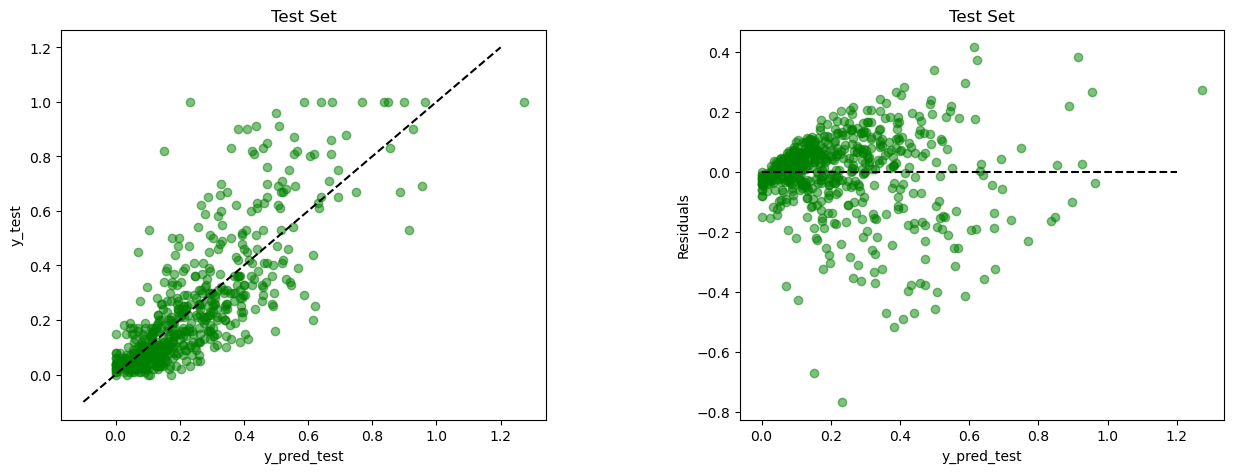

In [73]:
y_pred_test = model.predict(X_test)
# Correction: y_pred (per capita violent crimes) can not assume negative values
y_pred_test[y_pred_test < 0] = 0

nrp = X_test.shape[1]+1
rms = np.sqrt(sum((y_test-y_pred_test)**2)/(len(y_test)-nrp))

print('R^2: %.4f' % r2_score(y_test,y_pred_test))
print('MSE: %.4f' % mean_squared_error(y_test,y_pred_test))
print('MAE: %.4f' % mean_absolute_error(y_test,y_pred_test))
print('rms: %.4f' % rms)

plt.figure(figsize=(15, 10))
ax1 = plt.subplot(121)
ax1.scatter(y_pred_test, y_test, c = 'green', alpha = 0.5)
ax1.plot((-0.1,1.2),(-0.1,1.2), c = 'black', linestyle = 'dashed')
ax1.set_title('Test Set')
ax1.set_xlabel('y_pred_test')
ax1.set_ylabel('y_test')

ax2 = plt.subplot(122)
ax2.scatter(y_pred_test, y_pred_test - y_test, c = 'green', alpha = 0.5)
ax2.plot((0,1.2),(0,0), c = 'black', linestyle = 'dashed')
ax2.set_title('Test Set')
ax2.set_xlabel('y_pred_test')
ax2.set_ylabel('Residuals')

plt.subplots_adjust(wspace=0.4, top=0.5)
plt.show()

Feature ranking with recursive feature elimination showed to be the best method analysed to select predictors of ViolentCrimesPerPop. The best generalization on the test set was obtained using a robust linear regression estimator (RANSAC). The minimum rms = 0.140 (MSE = 0.019) was obtained for R^2= 0.654 on the test set.

**Exporting the best model**

In [74]:
import pickle

with open('../../models/regression task/linear_regression.pkl', 'wb') as file:
    pickle.dump(model, file)


# Conclusion

As we were asked, this was the implementation of the linear regression model to predict the crime rates in the united states.

A possible improvement could be achieved from the analysis of multicollinearity in the 33 features set and feature transformation. A starting point could be the analysis of the correlation matrix shown bellow.

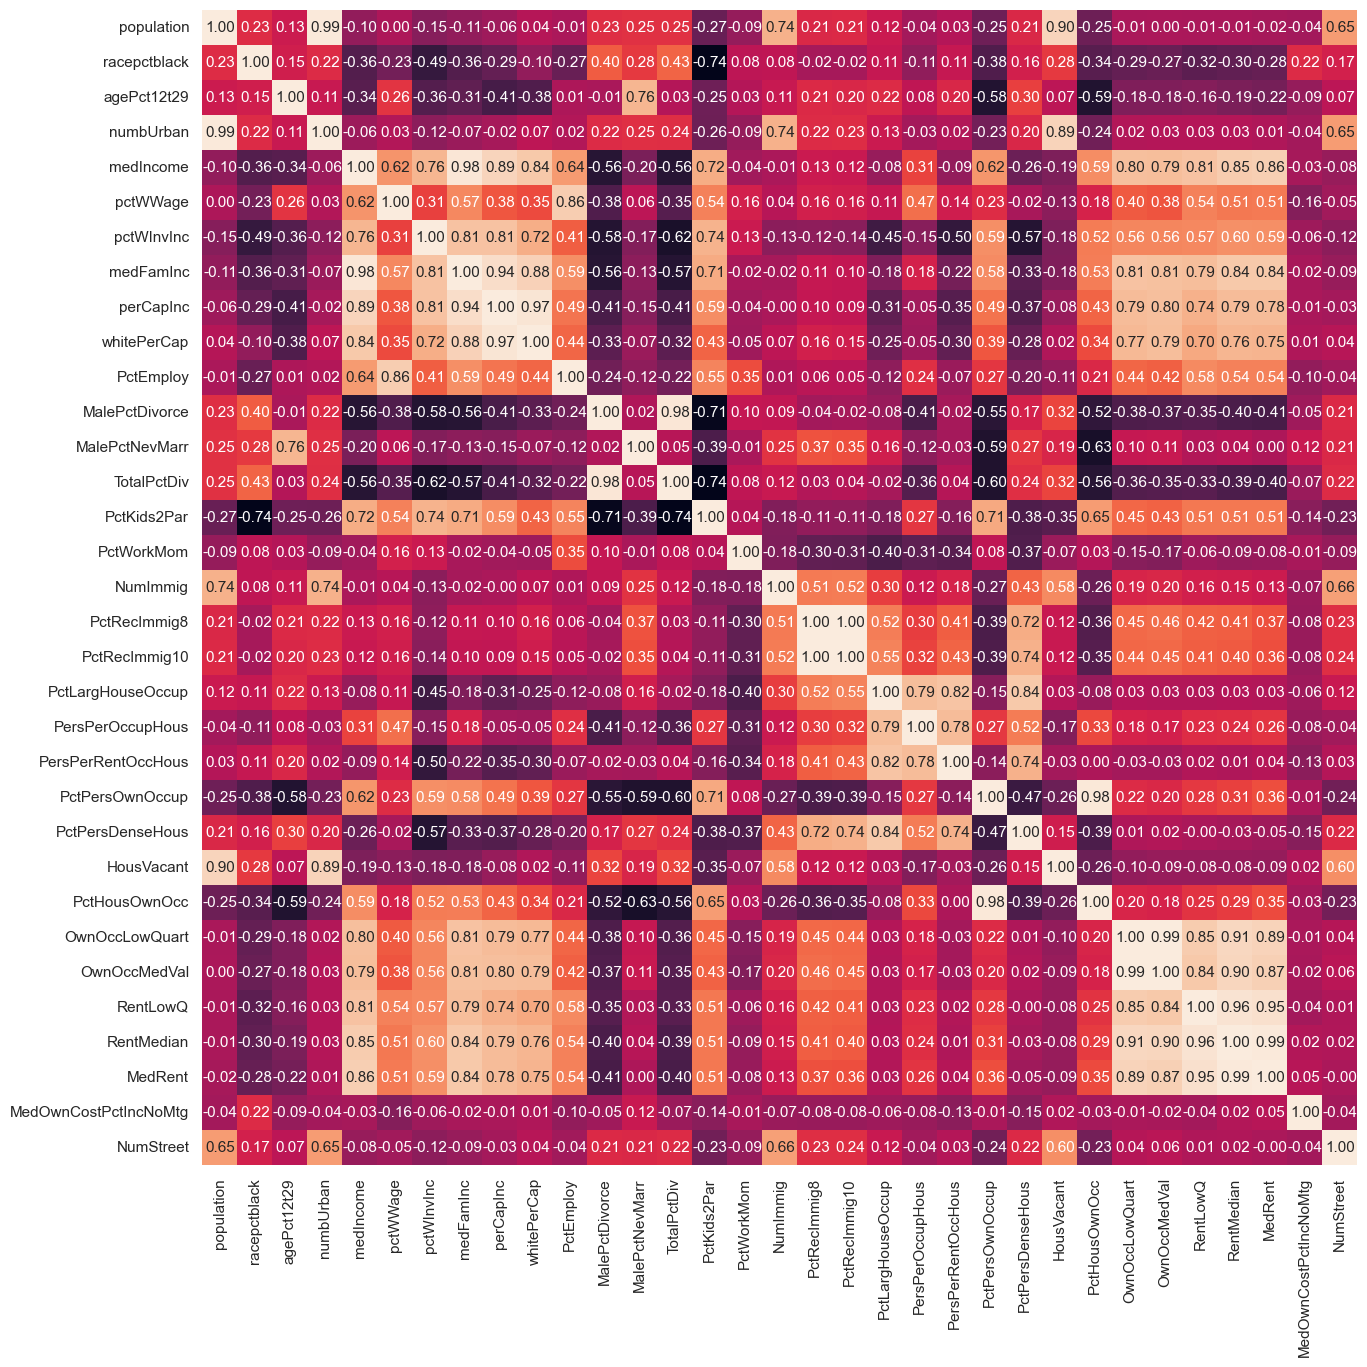

['population',
 'racepctblack',
 'agePct12t29',
 'numbUrban',
 'medIncome',
 'pctWWage',
 'pctWInvInc',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'PctEmploy',
 'MalePctDivorce',
 'MalePctNevMarr',
 'TotalPctDiv',
 'PctKids2Par',
 'PctWorkMom',
 'NumImmig',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctLargHouseOccup',
 'PersPerOccupHous',
 'PersPerRentOccHous',
 'PctPersOwnOccup',
 'PctPersDenseHous',
 'HousVacant',
 'PctHousOwnOcc',
 'OwnOccLowQuart',
 'OwnOccMedVal',
 'RentLowQ',
 'RentMedian',
 'MedRent',
 'MedOwnCostPctIncNoMtg',
 'NumStreet']

In [75]:
cols = list(data.iloc[:, 0:100].columns[mask])
cm = np.corrcoef(data[cols].values.T)

fig = plt.figure(figsize = (15, 15))
sns.set(font_scale=1)
hm = sns.heatmap(cm,
                 cbar=False,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 11},
                 yticklabels=cols,
                 xticklabels=cols)
plt.show()
cols